<a href="https://colab.research.google.com/github/Soloskey1/Bitcoin_Price_Analysis/blob/master/Bitcoin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# load dataset from colab
df = pd.read_csv('/content/drive/MyDrive/Bitcoin Historical Data6.csv')
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,04/08/2024,"71,347.9","69,358.0","71,442.1","69,110.5",55.11K,2.87%
1,04/07/2024,"69,360.4","68,897.3","70,285.8","68,849.4",46.99K,0.68%
2,04/06/2024,"68,890.6","67,830.5","69,632.0","67,467.2",41.48K,1.56%
3,04/05/2024,"67,830.6","68,498.7","68,692.2","66,023.3",88.97K,-0.97%
4,04/04/2024,"68,496.5","65,968.4","69,238.8","65,096.3",100.30K,3.84%
5,04/03/2024,"65,963.0","65,443.6","66,844.8","64,559.0",88.46K,0.80%
6,04/02/2024,"65,439.2","69,662.7","69,673.0","64,628.4",152.87K,-6.07%
7,04/01/2024,"69,664.4","71,329.3","71,329.3","68,175.9",94.05K,-2.34%
8,03/31/2024,"71,332.0","69,608.5","71,367.5","69,576.6",42.45K,2.47%
9,03/30/2024,"69,611.5","69,872.3","70,321.2","69,564.9",29.87K,-0.37%


# DATA EXPLORATION

In [25]:
# size  of the data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 5014 rows and 7 columns.


In [26]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      5014 non-null   object
 1   Price     5014 non-null   object
 2   Open      5014 non-null   object
 3   High      5014 non-null   object
 4   Low       5014 non-null   object
 5   Vol.      5008 non-null   object
 6   Change %  5014 non-null   object
dtypes: object(7)
memory usage: 274.3+ KB


In [27]:
# check for missing values
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,6
Change %,0


It appears we don't have any null values.

In [28]:
# check duplactes
df.duplicated().sum()

0

In [29]:
# unique years

# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


# Extract  and get unique years
unique_years = df['Date'].dt.year.unique()

# Print the unique years
print(list(unique_years))

[2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]


The Bitcoin price data in this analysis spans from 2010 to 2024, covering a significant period in Bitcoin's history. Over this time, Bitcoin has experienced substantial price fluctuations due to various factors such as market demand, regulatory changes, technological advancements, and broader economic conditions.

In [30]:
# sort date column
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [31]:
# remove punctuations from numeric columns
df['Price'] = df['Price'].str.replace(',', '').astype(np.float64)
df['Open'] = df['Open'].str.replace(',', '').astype(np.float64)
df['High'] = df['High'].str.replace(',', '').astype(np.float64)
df['Low'] = df['Low'].str.replace(',', '').astype(np.float64)

# change k to e3, m to e6, b to e9
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6').str.replace('B', 'e9').astype(np.float64)
# replace '%' with spaces in 'Change %'
df['Change %'] = df['Change %'].str.replace('%', '').astype(np.float64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5014 non-null   datetime64[ns]
 1   Price     5014 non-null   float64       
 2   Open      5014 non-null   float64       
 3   High      5014 non-null   float64       
 4   Low       5014 non-null   float64       
 5   Vol.      5008 non-null   float64       
 6   Change %  5014 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 274.3 KB


In [33]:
# Summarize data
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,5014,5014.000000,5014.000000,5014.000000,5014.000000,5.008000e+03,5014.000000
mean,2017-05-28 12:00:00,10987.032369,10972.777742,11244.819585,10682.951476,1.234002e+07,0.415931
min,2010-07-18 00:00:00,0.100000,0.000000,0.100000,0.000000,8.000000e+01,-57.210000
25%,2013-12-22 06:00:00,227.775000,227.475000,231.800000,222.125000,3.189750e+04,-1.170000
50%,2017-05-28 12:00:00,2233.800000,2213.000000,2325.850000,2081.100000,6.894500e+04,0.000000
75%,2020-11-01 18:00:00,16176.525000,16068.075000,16506.300000,15499.025000,1.842700e+05,1.790000
max,2024-04-08 00:00:00,73066.300000,73066.700000,73740.900000,71338.400000,4.470000e+09,336.840000
std,NaN,16186.048994,16164.058480,16566.087827,15735.167749,1.547513e+08,7.085502


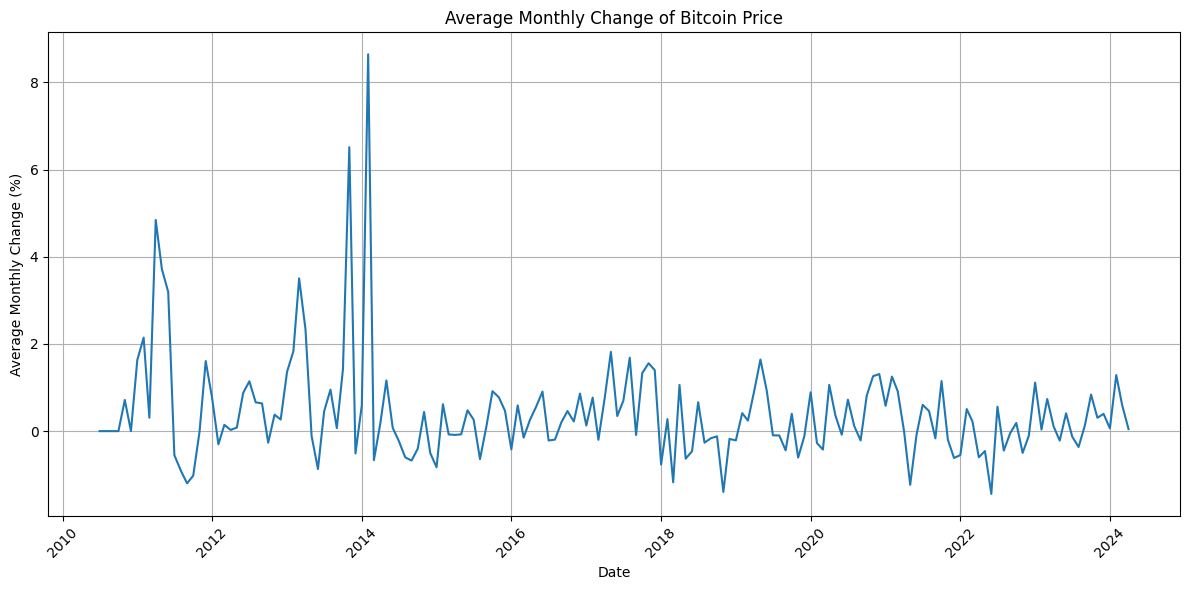

In [34]:
# To get average monthly change from 2010 - 2024

# df['Date'] = pd.to_datetime(df['Date'])
monthly_avg_change = df.groupby(df['Date'].dt.to_period('M'))['Change %'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_change.index.to_timestamp(), monthly_avg_change.values)
plt.xlabel('Date')
plt.ylabel('Average Monthly Change (%)')
plt.title('Average Monthly Change of Bitcoin Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Monthly Change of Bitcoin Price (2010-2024)

This line chart illustrates the average monthly percentage change in Bitcoin's price from 2010 to 2024.  The x-axis represents the date, spanning over a 14-year period, and the y-axis represents the average monthly percentage change.

**Key Observations:**

* **Volatility:** The chart clearly shows significant volatility in Bitcoin's price over the observed period.  The average monthly change fluctuates widely, indicating periods of both substantial gains and losses.
* **Trends (General):** The chart suggests periods where the average monthly change was consistently positive or negative.  Visual inspection could reveal potential bull or bear markets.
* **Potential Turning Points:**  Sharp changes in the slope, particularly around 2011 and between 2013 and 2014, might indicate important market events or shifts in investor sentiment.

This chart provides a visual overview of Bitcoin price fluctuations.  

In [35]:
# Calculate the yearly average price
yearly_avg_price = df.groupby(df['Date'].dt.year)['Price'].mean()

# Create the Plotly figure
fig = go.Figure()

# Add line trace for the average yearly price
fig.add_trace(go.Scatter(
    x=yearly_avg_price.index,
    y=yearly_avg_price.values,
    mode='lines+markers',
    name='Average Yearly Price',
    line=dict(color='blue'),
    marker=dict(size=8, color='red', line=dict(width=2, color='black'))
))

# Add titles and labels
fig.update_layout(
    title='Average Yearly Bitcoin Price (2010-2024)',
    xaxis_title='Year',
    yaxis_title='Average Yearly Price',
    template='plotly_dark',
    showlegend=True
)

# Show the plot
fig.show()


  The graph clearly illustrates a period of relative stability in the average yearly price of Bitcoin between 2010 and 2016, followed by a gradual upward trend, culminating in a sharp increase around 2020 and 2021, reaching a peak.


In [36]:
# Graph to compare the volumne of bitcoin to the price over the years

fig = go.Figure()

# Add trace for Bitcoin price
fig.add_trace(go.Scatter(x=df['Date'], y=df['Price'], name='Price', mode='lines'))

# Add trace for Bitcoin volume
fig.add_trace(go.Scatter(x=df['Date'], y=df['Vol.'], name='Volume', yaxis='y2', mode='lines'))

# Update layout for two y-axes
fig.update_layout(
    title='Bitcoin Price vs. Volume Over Time',
    xaxis_title='Date',
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Volume', overlaying='y', side='right'),
    template='plotly_dark'  # Optional: Use a dark theme
)

fig.show()

The chart depicts  visual comparison of price movements with corresponding trading volumes.  Ideally, high trading volume would accompany major price movements, but the chart allows for visual verification of the strength of price changes based on the associated trading volume.  You can look for periods where large price changes are not associated with high volume, which might indicate weaker price movements that are less sustainable.

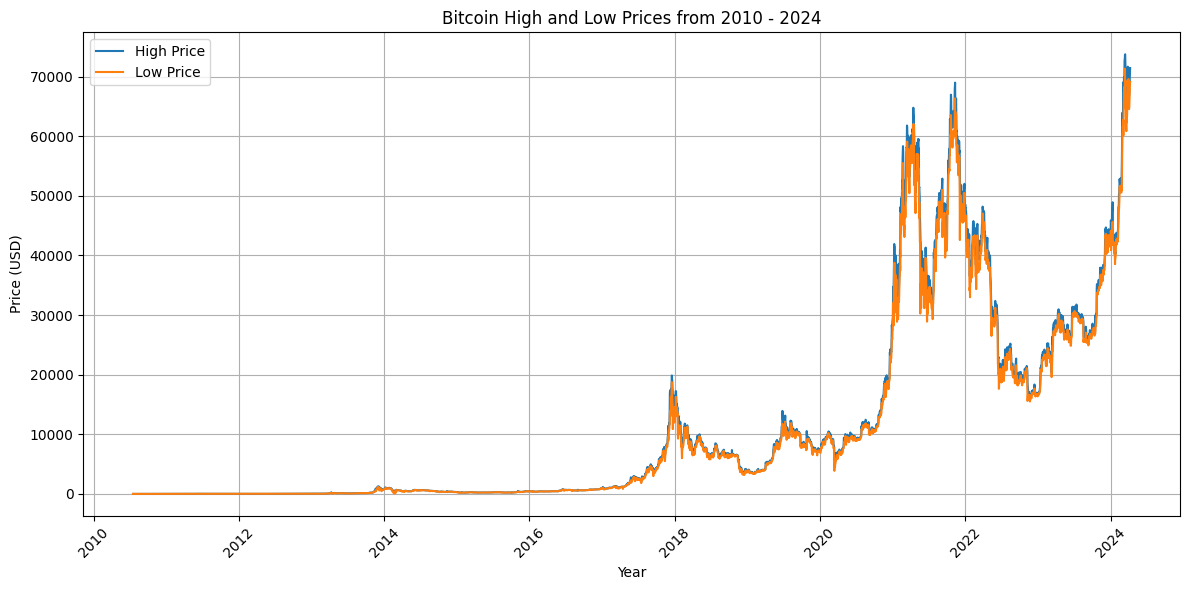

In [37]:
# Plot a chart to compare the  High and Low Price of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High Price')
plt.plot(df['Date'], df['Low'], label='Low Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.title('Bitcoin High and Low Prices from 2010 - 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bitcoin High and Low Prices:**  This line chart plots both the highest and lowest daily Bitcoin prices over the 14-year period.  It visually represents the price range within each time period, there's no significant difference between the Open an Close Price.

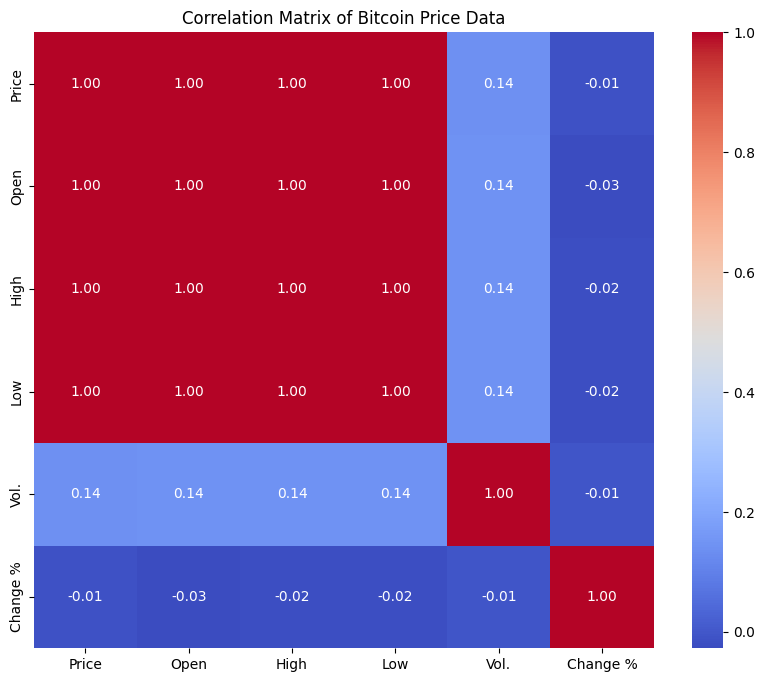

In [38]:
# Correlation Matrix
correlation_matrix = df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Price Data')
plt.show()

This correlation matrix shows the linear relationships between different Bitcoin price features.  A value close to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 suggests no linear relationship.  The high correlation between 'Price', 'Open', 'High', and 'Low' is expected because these prices are all related to the daily price movement.

FEATURE ENGINEERING TO COMBINE CORRELATED FEATURES

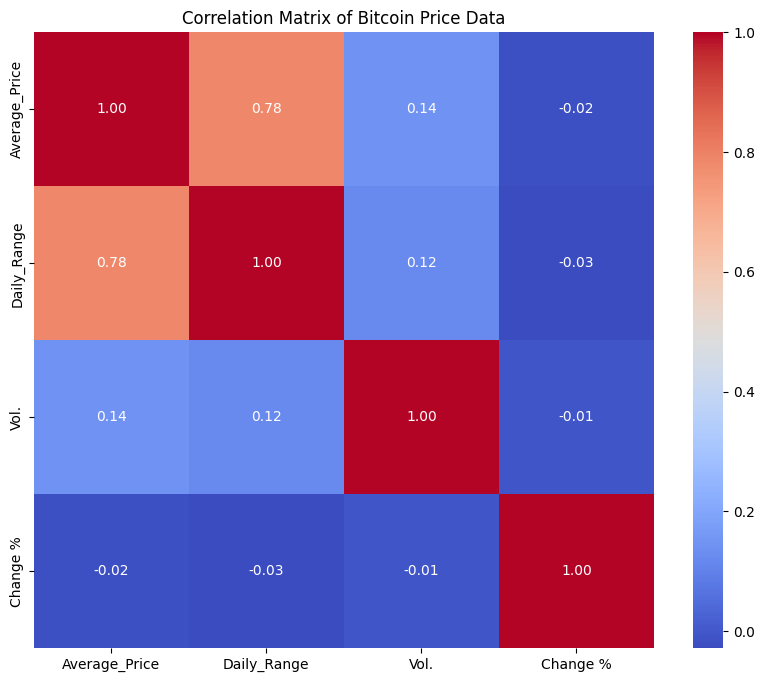

In [39]:

# Calculate the average price
df['Average_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Price']) / 4

# Calculate the daily range
df['Daily_Range'] = df['High'] - df['Low']

# ... (rest of your code)

# Drop highly correlated original columns
df = df.drop(['Open', 'High', 'Low'], axis = 1)

# Recalculate your correlation matrix
correlation_matrix = df[['Average_Price','Daily_Range', 'Vol.', 'Change %']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Price Data')
plt.show()

New features, such as Average_Price and Daily_Range, were engineered to address and reduce multicollinearity within the dataset. Multicollinearity arises when two or more features are highly correlated, which can negatively impact the performance of machine learning models by making it difficult to determine the individual influence of each feature on the target variable.

# TIME SERIES **ANALYSIS**

<Figure size 1300x900 with 0 Axes>

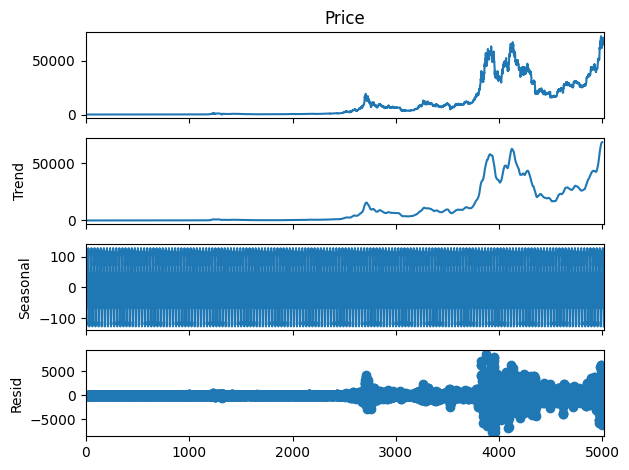

In [40]:
# Time series decomposition of the price to observe trends, seasonality, and residuals

decomposition = seasonal_decompose(df['Price'], model='additive', period=30) # Assuming a monthly seasonality
plt.figure(figsize=(13, 9))
fig = decomposition.plot()
plt.show()


The time series decomposition plot breaks down the Bitcoin 'Price' series into its trend, seasonality, and residuals (noise).

* **Trend:** Shows the long-term movement in the price. Overall, there's an upward trend showing that the price of Bitcoin is likely to increase in the future.
* **Seasonality:**  Reveals any repeating patterns in the price, perhaps a monthly cycle or other patterns.
* **Residuals:** The remaining variability that isn't explained by trend or seasonality.


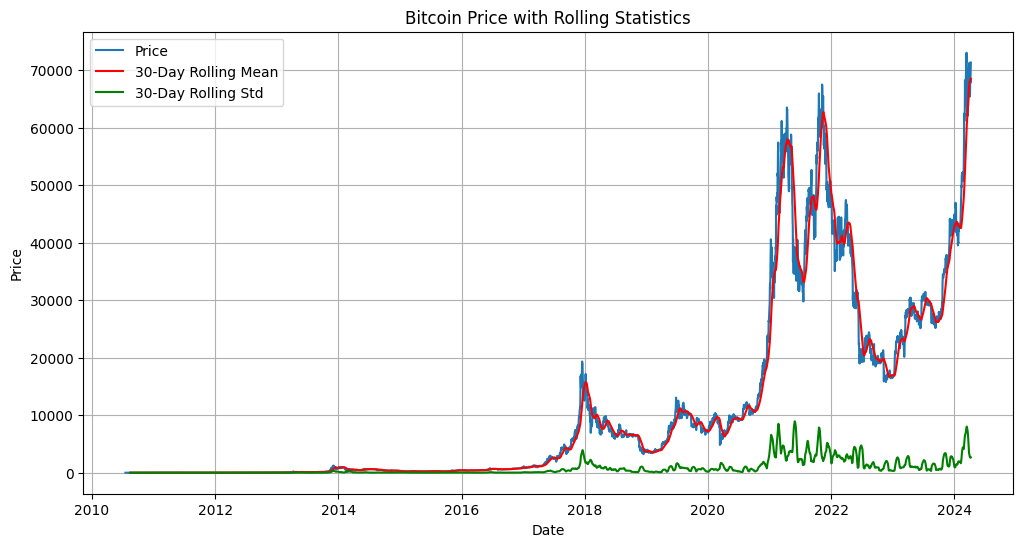

In [41]:
# Calculate rolling mean and standard deviation
window_size = 30  # Example window size (adjust as needed)
df['Rolling_Mean'] = df['Price'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Price'].rolling(window=window_size).std()

# Plot the rolling statistics along with the original price data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', color='red')
plt.plot(df['Date'], df['Rolling_Std'], label=f'{window_size}-Day Rolling Std', color='green')
plt.legend()
plt.title('Bitcoin Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Observation:**
The decomposition of the Bitcoin price time series reveals its trend, seasonality, and residual components. The rolling mean and rolling standard deviation effectively smooth out short-term fluctuations, allowing for a clearer visualization of the underlying longer-term trends and volatility patterns. The rolling mean, in particular, serves as a moving average of the price, while the rolling standard deviation quantifies the level of price variability over time.

**Implication:**
The analysis suggests that the 30-day rolling mean closely tracks the price, indicating that the price has been following a smooth, predictable path without substantial deviations. This suggests a period of consolidation or low market activity, where the price moves steadily in a narrow range, without sharp spikes or dips. <br>
Furthermore, the 30-day rolling standard deviation remaining near zero reinforces the notion of low volatility, implying that there have been minimal fluctuations in the price during this period. This suggests that the market is currently in a stable phase, with little to no significant price swings or sudden shifts in momentum. Consequently, traders and analysts might interpret this as a period of market equilibrium, potentially setting the stage for a future breakout or shift in market dynamics when volatility eventually returns.